In [4]:
import pandas as pd
import numpy as np 
import bs4 as bs
import requests
import lxml.html as lh
import urllib.request
import csv

# Extract the data using Beautiful Soup

In [5]:
url = "https://en.wikipedia.org/wiki/Category:Districts_of_Paris"
data_extract = requests.get(url).text
wikipedia_data = bs.BeautifulSoup(data_extract, 'lxml')

csv_file = open('paris.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [6]:
mwcg = wikipedia_data.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [7]:
csv_file.close()
paris_raw = pd.read_csv('paris.csv')

In [8]:
paris_raw.shape

(29, 1)

In [41]:
paris_raw

,Neighbourhood,Latitude,Longitude
0,Batignolles,48.883330,2.316670
1,"Belleville, Paris",48.870180,2.384230
2,Bercy,48.834880,2.384590
3,Cité des Fleurs,48.892615,2.320325
4,Cour des miracles,45.748590,4.881920
5,Épinettes,48.842963,2.325298
6,Faubourg Saint-Antoine,48.850940,2.375670
7,Faubourg Saint-Germain,48.857815,2.323802
8,Front de Seine,48.849350,2.285730
9,Goutte d'Or,48.885040,2.353950


# Transform the data

We see that row 23 of the dataframe is an unvalid data so we remove it.

In [40]:
paris_raw.drop(paris_raw.index[24])
paris_raw.reset_index(drop = True)

,Neighbourhood,Latitude,Longitude
0,Batignolles,48.883330,2.316670
1,"Belleville, Paris",48.870180,2.384230
2,Bercy,48.834880,2.384590
3,Cité des Fleurs,48.892615,2.320325
4,Cour des miracles,45.748590,4.881920
5,Épinettes,48.842963,2.325298
6,Faubourg Saint-Antoine,48.850940,2.375670
7,Faubourg Saint-Germain,48.857815,2.323802
8,Front de Seine,48.849350,2.285730
9,Goutte d'Or,48.885040,2.353950


In [11]:
!pip install geocoder
import geocoder # to get longitude and latitude

! pip install folium==0.5.0
import folium # plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

In [13]:
# Initialize variables
latitude = []
longitude = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = paris_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Paris, FR'.format(nh))
    lat_lng_coords = g.latlng
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])

In [14]:
paris_data = paris_raw
paris_data['Latitude'] = latitude
paris_data['Longitude'] = longitude

In [15]:
paris_data.head()

,Neighbourhood,Latitude,Longitude
0,Batignolles,48.883330,2.316670
1,"Belleville, Paris",48.870180,2.384230
2,Bercy,48.834880,2.384590
3,Cité des Fleurs,48.892615,2.320325
4,Cour des miracles,45.748590,4.881920


# Foursquare

In [16]:
CLIENT_ID = 'VZYXHBJPNUGDT3TYRVI3KHPBSTU0LLG0XMDU00IZYKELBYBU' # your Foursquare ID
CLIENT_SECRET = 'HGAOW4RQN5UMSFQO4K4MUHYTJTP3YV5Q2SAIQ1JLZUPY3M1Z' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: VZYXHBJPNUGDT3TYRVI3KHPBSTU0LLG0XMDU00IZYKELBYBU
CLIENT_SECRET:HGAOW4RQN5UMSFQO4K4MUHYTJTP3YV5Q2SAIQ1JLZUPY3M1Z


In [17]:
from geopy.geocoders import Nominatim

address = 'Paris, FR'

geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [18]:
paris_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(paris_map)  
    
paris_map

In [19]:
def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
import json 
import requests 
from pandas.io.json import json_normalize 

explore_df_list = []

for i, nhood_name in enumerate(paris_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = paris_data.loc[i, 'Neighbourhood']
        nhood_lat = paris_data.loc[i, 'Latitude']
        nhood_lng = paris_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:25: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [21]:
explore_paris = pd.DataFrame([item for item in explore_df_list])
explore_paris.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_paris.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Batignolles,48.88333,2.31667,Brutus,Creperie,48.883028,2.318225
1,Batignolles,48.88333,2.31667,Bières Cultes,Liquor Store,48.884219,2.314272
2,Batignolles,48.88333,2.31667,Les Beaux Gamins,Bar,48.883640,2.316670
3,Batignolles,48.88333,2.31667,Marché de Levis,Farmers Market,48.883130,2.314958
4,Batignolles,48.88333,2.31667,Saïdoune,Lebanese Restaurant,48.884715,2.315185


# One Hot Encoding Technique

In [22]:
paris_1hot = pd.get_dummies(explore_paris[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
paris_1hot['Neighbourhood'] = explore_paris['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [paris_1hot.columns[-1]] + paris_1hot.columns[:-1].values.tolist()
paris_1hot = paris_1hot[fixed_columns]

paris_1hot.head()

,Neighbourhood,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,...,Toy / Game Store,Trail,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Batignolles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Batignolles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Batignolles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Batignolles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Batignolles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
paris_grouped = paris_1hot.groupby('Neighbourhood').mean().reset_index()
paris_grouped.head()

,Neighbourhood,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,...,Toy / Game Store,Trail,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Batignolles,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.100000,0.000000,0.0
1,Bercy,0.0,0.0,0.0,0.000000,0.0,0.033333,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.033333,0.000000,0.0
2,Cité des Fleurs,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.033333,0.0,0.0,0.000000,0.066667,0.000000,0.0
3,Cour des miracles,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.038462,0.0,...,0.0,0.000000,0.038462,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,Faubourg Saint-Antoine,0.0,0.0,0.0,0.033333,0.0,0.000000,0.033333,0.000000,0.0,...,0.0,0.033333,0.000000,0.000000,0.0,0.0,0.033333,0.033333,0.033333,0.0


In [25]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [26]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = paris_grouped['Neighbourhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(paris_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles,French Restaurant,Wine Bar,Pastry Shop,Bar,Restaurant,Italian Restaurant,Coffee Shop,Creperie,Modern European Restaurant,Middle Eastern Restaurant
1,Bercy,French Restaurant,Multiplex,Museum,Garden,Lounge,Beer Garden,Recording Studio,Department Store,Portuguese Restaurant,Performing Arts Venue
2,Cité des Fleurs,French Restaurant,Park,Pizza Place,Restaurant,Wine Bar,Pedestrian Plaza,Italian Restaurant,Brazilian Restaurant,Bookstore,Bistro
3,Cour des miracles,Supermarket,Museum,Plaza,Pizza Place,Garden,French Restaurant,Bakery,Park,Brasserie,Sandwich Place
4,Faubourg Saint-Antoine,French Restaurant,Bakery,Bookstore,Italian Restaurant,Bar,Cocktail Bar,Dance Studio,Farmers Market,Middle Eastern Restaurant,Food & Drink Shop


In [27]:
paris_grouped_clustering = paris_grouped.drop('Neighbourhood', 1)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [29]:
max_range = 15 #Max number of clusters

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for paris_clusters in range(2, max_range) :
    
    # Run k-means clustering
    paris_gc = paris_grouped_clustering
    kmeans = KMeans(n_clusters = paris_clusters, init = 'k-means++', random_state = 0).fit_predict(paris_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(paris_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(paris_clusters)
    scores.append(score)

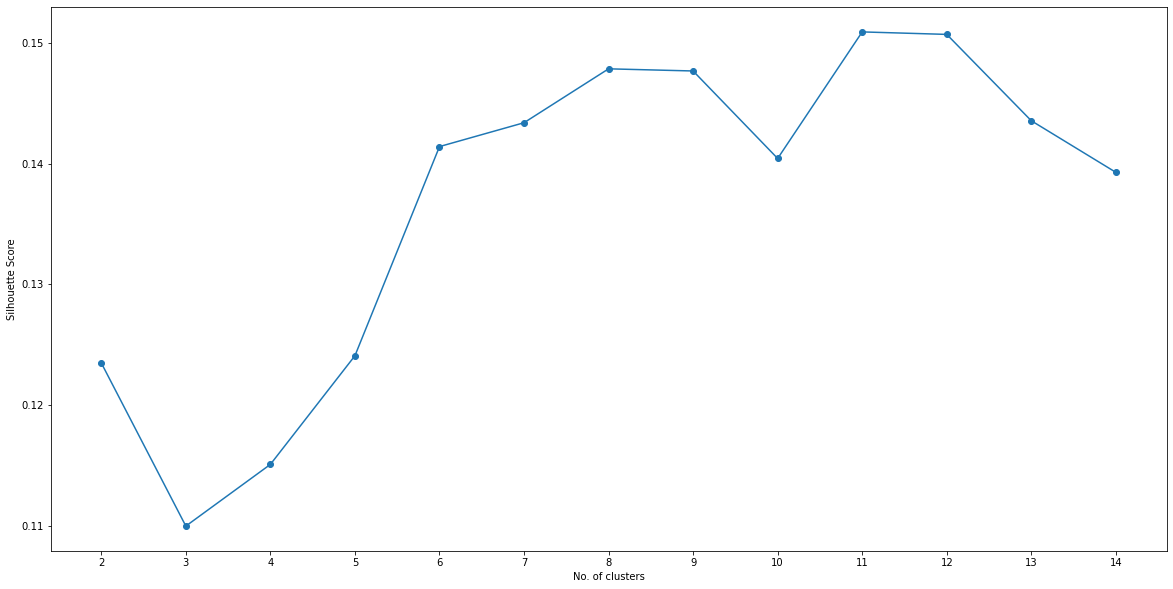

In [30]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

Thanks to the Elbow Method we see here that k = 3 is the best value.

In [31]:
k_final = 3

In [32]:
paris_clusters = k_final

# Run k-means clustering
paris_gc = paris_grouped_clustering
kmeans = KMeans(n_clusters = paris_clusters, init = 'k-means++', random_state = 0).fit(paris_gc)

In [33]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [34]:
paris_final = paris_data
paris_final = paris_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
paris_final.dropna(inplace = True)
paris_final['Cluster Labels'] = paris_final['Cluster Labels'].astype(int)
paris_final.head()


,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles,48.883330,2.316670,0,French Restaurant,Wine Bar,Pastry Shop,Bar,Restaurant,Italian Restaurant,Coffee Shop,Creperie,Modern European Restaurant,Middle Eastern Restaurant
2,Bercy,48.834880,2.384590,0,French Restaurant,Multiplex,Museum,Garden,Lounge,Beer Garden,Recording Studio,Department Store,Portuguese Restaurant,Performing Arts Venue
3,Cité des Fleurs,48.892615,2.320325,2,French Restaurant,Park,Pizza Place,Restaurant,Wine Bar,Pedestrian Plaza,Italian Restaurant,Brazilian Restaurant,Bookstore,Bistro
4,Cour des miracles,45.748590,4.881920,0,Supermarket,Museum,Plaza,Pizza Place,Garden,French Restaurant,Bakery,Park,Brasserie,Sandwich Place
5,Épinettes,48.842963,2.325298,1,Hotel,Creperie,French Restaurant,Japanese Restaurant,Ice Cream Shop,Auvergne Restaurant,Comfort Food Restaurant,Theater,Thai Restaurant,Scenic Lookout


In [36]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(paris_clusters)
ys = [i + x + (i*x)**2 for i in range(paris_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(paris_final['Latitude'], paris_final['Longitude'], paris_final['Neighbourhood'], 
                                  paris_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [37]:
val = 1
paris_final.loc[paris_final['Cluster Labels'] == (val - 1), paris_final.columns[[0] + np.arange(4, paris_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles,French Restaurant,Wine Bar,Pastry Shop,Bar,Restaurant,Italian Restaurant,Coffee Shop,Creperie,Modern European Restaurant,Middle Eastern Restaurant
2,Bercy,French Restaurant,Multiplex,Museum,Garden,Lounge,Beer Garden,Recording Studio,Department Store,Portuguese Restaurant,Performing Arts Venue
4,Cour des miracles,Supermarket,Museum,Plaza,Pizza Place,Garden,French Restaurant,Bakery,Park,Brasserie,Sandwich Place
6,Faubourg Saint-Antoine,French Restaurant,Bakery,Bookstore,Italian Restaurant,Bar,Cocktail Bar,Dance Studio,Farmers Market,Middle Eastern Restaurant,Food & Drink Shop
9,Goutte d'Or,French Restaurant,Bookstore,Bistro,Beer Store,Indian Restaurant,Coffee Shop,BBQ Joint,Breakfast Spot,Record Shop,Restaurant
13,Quartier de La Chapelle,French Restaurant,Japanese Restaurant,Beer Store,Indian Restaurant,African Restaurant,Supermarket,Middle Eastern Restaurant,Café,Record Shop,Bistro
14,"Latin Quarter, Paris",Bakery,French Restaurant,Plaza,Café,Italian Restaurant,Comic Shop,Cheese Shop,Museum,Monument / Landmark,Japanese Restaurant
15,Les Halles,French Restaurant,Plaza,Historic Site,Hotel,Restaurant,Spa,Women's Store,Bakery,Chinese Restaurant,Pedestrian Plaza
16,The Marais,Art Gallery,Clothing Store,Creperie,Falafel Restaurant,Café,Bistro,Bookstore,Scandinavian Restaurant,Sandwich Place,Burger Joint
17,Ménilmontant,Bar,French Restaurant,Music Venue,Moroccan Restaurant,Restaurant,Beer Bar,Italian Restaurant,African Restaurant,Park,Cocktail Bar


In [38]:
val = 2
paris_final.loc[paris_final['Cluster Labels'] == (val - 1), paris_final.columns[[0] + np.arange(4, paris_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Épinettes,Hotel,Creperie,French Restaurant,Japanese Restaurant,Ice Cream Shop,Auvergne Restaurant,Comfort Food Restaurant,Theater,Thai Restaurant,Scenic Lookout
8,Front de Seine,Gym / Fitness Center,Hotel,Japanese Restaurant,Bakery,Bistro,Grocery Store,Dessert Shop,Korean Restaurant,Shopping Mall,Park
10,Grenelle,French Restaurant,Hotel,Japanese Restaurant,Bakery,Gym / Fitness Center,Bistro,Multiplex,Plaza,Park,Coffee Shop
11,"Jardin de Tivoli, Paris",Plaza,Art Museum,Hotel,Exhibit,Historic Site,Udon Restaurant,Garden,Italian Restaurant,Café,Ramen Restaurant
12,"Javel, France",Hotel,French Restaurant,Gym / Fitness Center,Park,Korean Restaurant,Gourmet Shop,Persian Restaurant,Coffee Shop,Multiplex,Beer Bar
19,Montparnasse,French Restaurant,Hotel,Japanese Restaurant,Auvergne Restaurant,Italian Restaurant,Creperie,Dessert Shop,Scenic Lookout,Supermarket,Ice Cream Shop
28,Trocadéro,French Restaurant,Hotel,Plaza,Italian Restaurant,Museum,Burger Joint,Brasserie,Garden,Pizza Place,Restaurant


In [39]:
val = 3
paris_final.loc[paris_final['Cluster Labels'] == (val - 1), paris_final.columns[[0] + np.arange(4, paris_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Cité des Fleurs,French Restaurant,Park,Pizza Place,Restaurant,Wine Bar,Pedestrian Plaza,Italian Restaurant,Brazilian Restaurant,Bookstore,Bistro
7,Faubourg Saint-Germain,French Restaurant,Garden,Art Museum,Bakery,Peruvian Restaurant,Clothing Store,Brasserie,Cheese Shop,Pizza Place,Pedestrian Plaza
22,Petit-Montrouge,French Restaurant,Hotel,Italian Restaurant,Tea Room,Bistro,Moroccan Restaurant,Fast Food Restaurant,Food & Drink Shop,Bakery,Brasserie
26,Quartier Pigalle,French Restaurant,Cocktail Bar,Italian Restaurant,Plaza,Bakery,Coffee Shop,Taco Place,Concert Hall,Cheese Shop,Music Venue


## Conclusion : We see that cluster number 2 has the most number of restaurants. We can also see that they are a lot of Frenc Restaurants in the different clusters as the 1st Common Venue. For our contractor, we can advise that it is not a good idea to open a French Restaurant.